In [71]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 10)

In [3]:
import pandas as pd

In [4]:
IN_PATH: str = '../results/training/_raw'
OUT_PATH: str = '../results/training'

In [5]:
DATASETS: list = ['train', 'test']

In [6]:
MODELS: list = [ 'base', 'textattack', 'fabriceyhc', 'wakaka']

In [7]:
### Analyse training along epochs

In [8]:
def convert_to_multi_col(df:pd.DataFrame, meta_col: str) -> pd.DataFrame:
    df.columns = pd.MultiIndex.from_product([[meta_col], df.columns], names=['model', 'metric'])

    return df

In [25]:
epochs: pd.DataFrame = (
    pd.concat(
    [(
        pd
        .read_csv(f'{IN_PATH}/{model}.metric.training.csv', index_col=0)
        .pipe(convert_to_multi_col, model)
    )
        for model in MODELS],
    axis=1)
)

In [26]:
epochs_formatted = (
    epochs
    .filter(regex="f1_.*")
    .iloc[range(9, 100, 10)]
)

In [104]:
epochs_formatted.to_csv(f'{OUT_PATH}/epochs.csv')
epochs_formatted.style.to_latex(f'{OUT_PATH}/_tex/epochs.tex')
display(epochs_formatted)
print(epochs_formatted.to_markdown())

model       base           textattack           fabriceyhc            \
metric  f1_train   f1_test   f1_train   f1_test   f1_train   f1_test   
epoch                                                                  
10      0.892985  0.887505   0.978517  0.934156   0.987471  0.931333   
20      0.902662  0.889480   0.984259  0.932180   0.988034  0.931212   
30      0.912501  0.891738   0.986949  0.930809   0.988756  0.931696   
40      0.921375  0.887827   0.990202  0.930285   0.990041  0.930245   
50      0.930290  0.884642   0.991447  0.931293   0.990764  0.929680   
60      0.932378  0.890851   0.992732  0.929600   0.991969  0.930164   
70      0.938281  0.886617   0.993736  0.930325   0.992491  0.929398   
80      0.942055  0.891174   0.994137  0.933108   0.992611  0.928632   
90      0.944906  0.882384   0.994097  0.930083   0.993133  0.928551   
100     0.950367  0.882384   0.995342  0.930285   0.993455  0.931495   

model     wakaka            
metric  f1_train   f1_test  
epoch                       
10      0.905192  0.902101  
20      0.915271  0.901536  
30      0.923021  0.903189  
40      0.931454  0.904883  
50      0.937397  0.898875  
60      0.945509  0.900165  
70      0.947195  0.897827  
80      0.951050  0.902625  
90      0.953741  0.900085  
100     0.956310  0.903673

|   epoch |   ('base', 'f1_train') |   ('base', 'f1_test') |   ('textattack', 'f1_train') |   ('textattack', 'f1_test') |   ('fabriceyhc', 'f1_train') |   ('fabriceyhc', 'f1_test') |   ('wakaka', 'f1_train') |   ('wakaka', 'f1_test') |
|--------:|-----------------------:|----------------------:|-----------------------------:|----------------------------:|-----------------------------:|----------------------------:|-------------------------:|------------------------:|
|      10 |               0.892985 |              0.887505 |                     0.978517 |                    0.934156 |                     0.987471 |                    0.931333 |                 0.905192 |                0.902101 |
|      20 |               0.902662 |              0.88948  |                     0.984259 |                    0.93218  |                     0.988034 |                    0.931212 |                 0.915271 |                0.901536 |
|      30 |               0.912501 |              0.8917

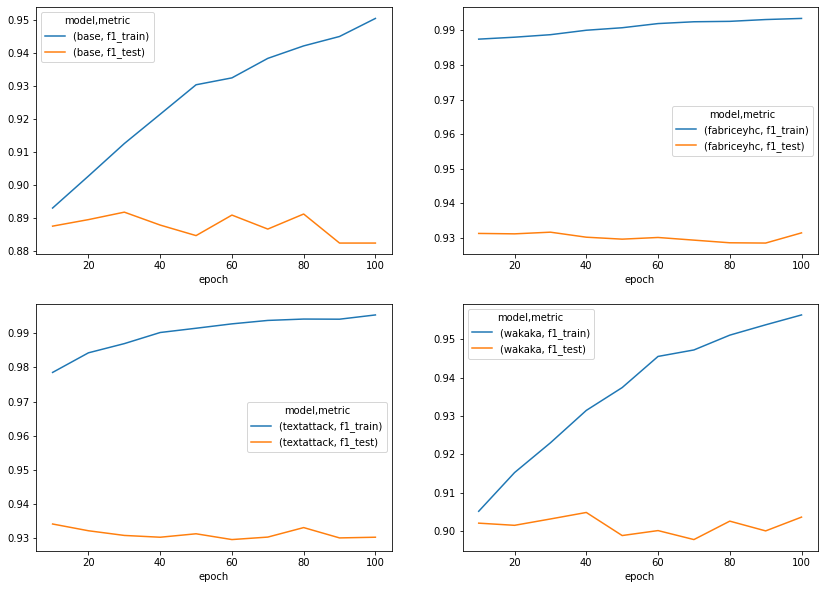

In [73]:
import matplotlib.pyplot as plt
plt.figure(1)

for idx, (label, group) in enumerate(epochs_formatted.T.groupby('model')):
    plt.subplot(2, 2, idx+1)
    group.T.plot(ax=plt.gca())

plt.savefig(f'{OUT_PATH}/epochs.png')

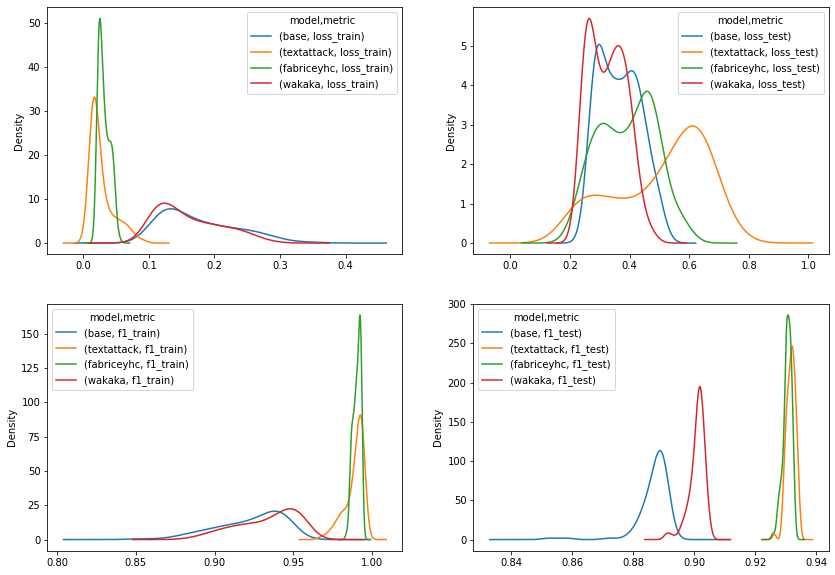

In [76]:
import matplotlib.pyplot as plt
plt.figure(2)
subplot: int = 1

for metric in ['loss', 'f1']:
    for label in DATASETS:
        plt.subplot(2, 2, subplot)
        epochs.filter(regex=f'{metric}_{label}').plot.kde(ax=plt.gca())
        subplot += 1

plt.savefig(f'{OUT_PATH}/epochs.density.png')

In [102]:
evaluation: pd.DataFrame = (
    epochs_formatted.iloc[-1]
    .reset_index(level=1)
    .rename(columns={'metric': 'dataset'})
    .assign(dataset=lambda df_: df_['dataset'].str.replace("f1_", ""))
    .set_index('dataset', append=True)
    .rename(columns={100: 'f1'})
    .round(3)
)

In [105]:
evaluation.to_csv(f'{OUT_PATH}/evaluation.csv')
evaluation.style.to_latex(f'{OUT_PATH}/_tex/evaluation.tex')
display(evaluation)
print(evaluation.to_markdown())

f1
model      dataset       
base       train    0.950
           test     0.882
textattack train    0.995
           test     0.930
fabriceyhc train    0.993
           test     0.931
wakaka     train    0.956
           test     0.904

|                         |    f1 |
|:------------------------|------:|
| ('base', 'train')       | 0.95  |
| ('base', 'test')        | 0.882 |
| ('textattack', 'train') | 0.995 |
| ('textattack', 'test')  | 0.93  |
| ('fabriceyhc', 'train') | 0.993 |
| ('fabriceyhc', 'test')  | 0.931 |
| ('wakaka', 'train')     | 0.956 |
| ('wakaka', 'test')      | 0.904 |


In [15]:
test: pd.DataFrame = (
    pd.concat(
    [(
        pd
        .read_csv(f'{IN_PATH}/{model}.metric.test.csv', index_col=0)
        .pipe(convert_to_multi_col, model)
    )
        for model in MODELS],
    axis=1)
    .round(3)
)

In [17]:
test_subset = (
    test
    .filter(regex="(prec|rec|f1)")
)

In [77]:
test_subset

model      base               textattack               fabriceyhc         \
metric     prec    rec     f1       prec    rec     f1       prec    rec   
label                                                                      
AVG       0.892  0.892  0.892      0.935  0.935  0.935      0.933  0.933   
negative  0.895  0.886  0.891      0.931  0.938  0.935      0.930  0.935   
positive  0.888  0.897  0.893      0.938  0.931  0.934      0.935  0.930   

model           wakaka                
metric       f1   prec    rec     f1  
label                                 
AVG       0.933  0.905  0.905  0.905  
negative  0.933  0.909  0.899  0.904  
positive  0.933  0.901  0.910  0.906